# Exploratory Data Analysis (EDA) of UFC dataset

## 1. Read data and check column

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [108]:
df = pd.read_csv("../datasets/data.csv")

df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Anthony Smith,Khalil Rountree Jr.,Mark Smith,2023-12-09,"Las Vegas, Nevada, USA",Blue,False,LightHeavyweight,0.846558,0.003906,0.513517,0.442042,0.000000,0.013328,0.000977,0.000122,0.000000,0.000000,91.936035,37.195679,88.720215,41.244995,93.035400,38.033447,92.940186,44.925903,0.125000,0.000000,1.404053,0.065430,73.664795,22.621338,67.108032,23.292358,10.156006,7.614380,12.142578,9.675049,8.115234,6.959961,9.469604,8.277588,84.911133,32.224121,85.758179,39.245361,4.540649,3.426392,2.648438,1.780273,2.484253,1.545166,0.313599,0.219360,17.937744,4.995972,413.148804,26,1,0,2,4,8,6,0,0.0,1.0,1.0,6.0,0.0,0.0,Southpaw,185.42,193.04,205.0,0.125420,0.011841,0.538892,0.401560,0.264596,0.284723,0.081066,0.000002,0.000017,0.015686,105.356533,59.717880,155.639414,60.519283,106.912781,61.244738,165.833305,68.061056,2.421747,0.770084,0.928648,0.353144,68.010708,29.193089,118.783186,32.606531,13.347809,9.542440,17.966904,10.427622,23.998016,20.982351,18.889324,17.485130,103.846695,58.651762,140.668631,49.713648,0.803675,0.524130,2.329470,1.785358,0.706163,0.541988,12.641314,9.020277,62.802755,79.061634,778.111862,50,1,0,1,3,12,8,0,0.0,1.0,1.0,5.0,4.0,1.0,Orthodox,193.04,193.04,205.0,33.0,35.0
1,Song Kenan,Kevin Jousset,Mark Smith,2023-12-09,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.000000,0.000000,0.500000,0.660000,1.000000,0.000000,1.000000,0.000000,0.0000

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 8.1+ MB


In [134]:
red_cols = []
blue_cols = []
other_cols = []

for col in df.columns:
    # select right list to append col based on col starting with R_ or B_
    # Python treats booleans as ordinary numbers
    (other_cols, red_cols, blue_cols)[col.startswith("R_") or 2 * col.startswith("B_")].append(col)

print(f"Red fighter features:  {len(red_cols)}")
print(f"Blue fighter features: {len(blue_cols)}")
print(f"Other features:        {len(other_cols)}")

Red fighter features:  69
Blue fighter features: 69
Other features:        6


## 2. Explore generic features

We can analyse the distributions of these *generic* features by counting/time-series. For each, some questions are formulated:
- **Referee**
  - Who has referee'd the most (by weight class, by title bout)?
- **Date**
  - How many matches and how far apart over time?
- **Location**
  - What is the distribution of matches in certain locations?
- **Winner**
  - What is the distribution of red/blue wins?
  - What is the distribution of red/blue wins given weight class?

In [135]:
other_cols

['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class']

### 2.1. Referee counts

<AxesSubplot: title={'center': "Number of matches Referee'd"}>

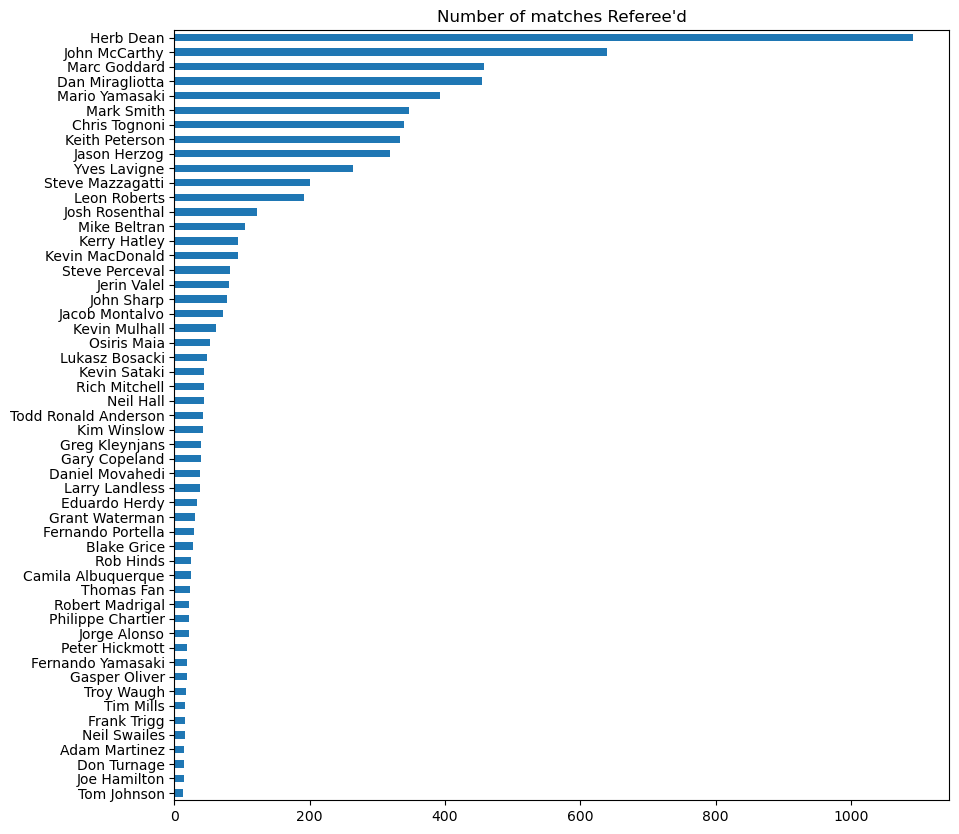

In [296]:
ref_counts = df['Referee'].value_counts()
# cut-off at 75 percent quantile for graphical convenience
ref_counts = ref_counts[ref_counts > ref_counts.quantile(.75)][::-1]
ref_counts.plot(kind='barh', figsize=(10, 10), title="Number of matches Referee'd")

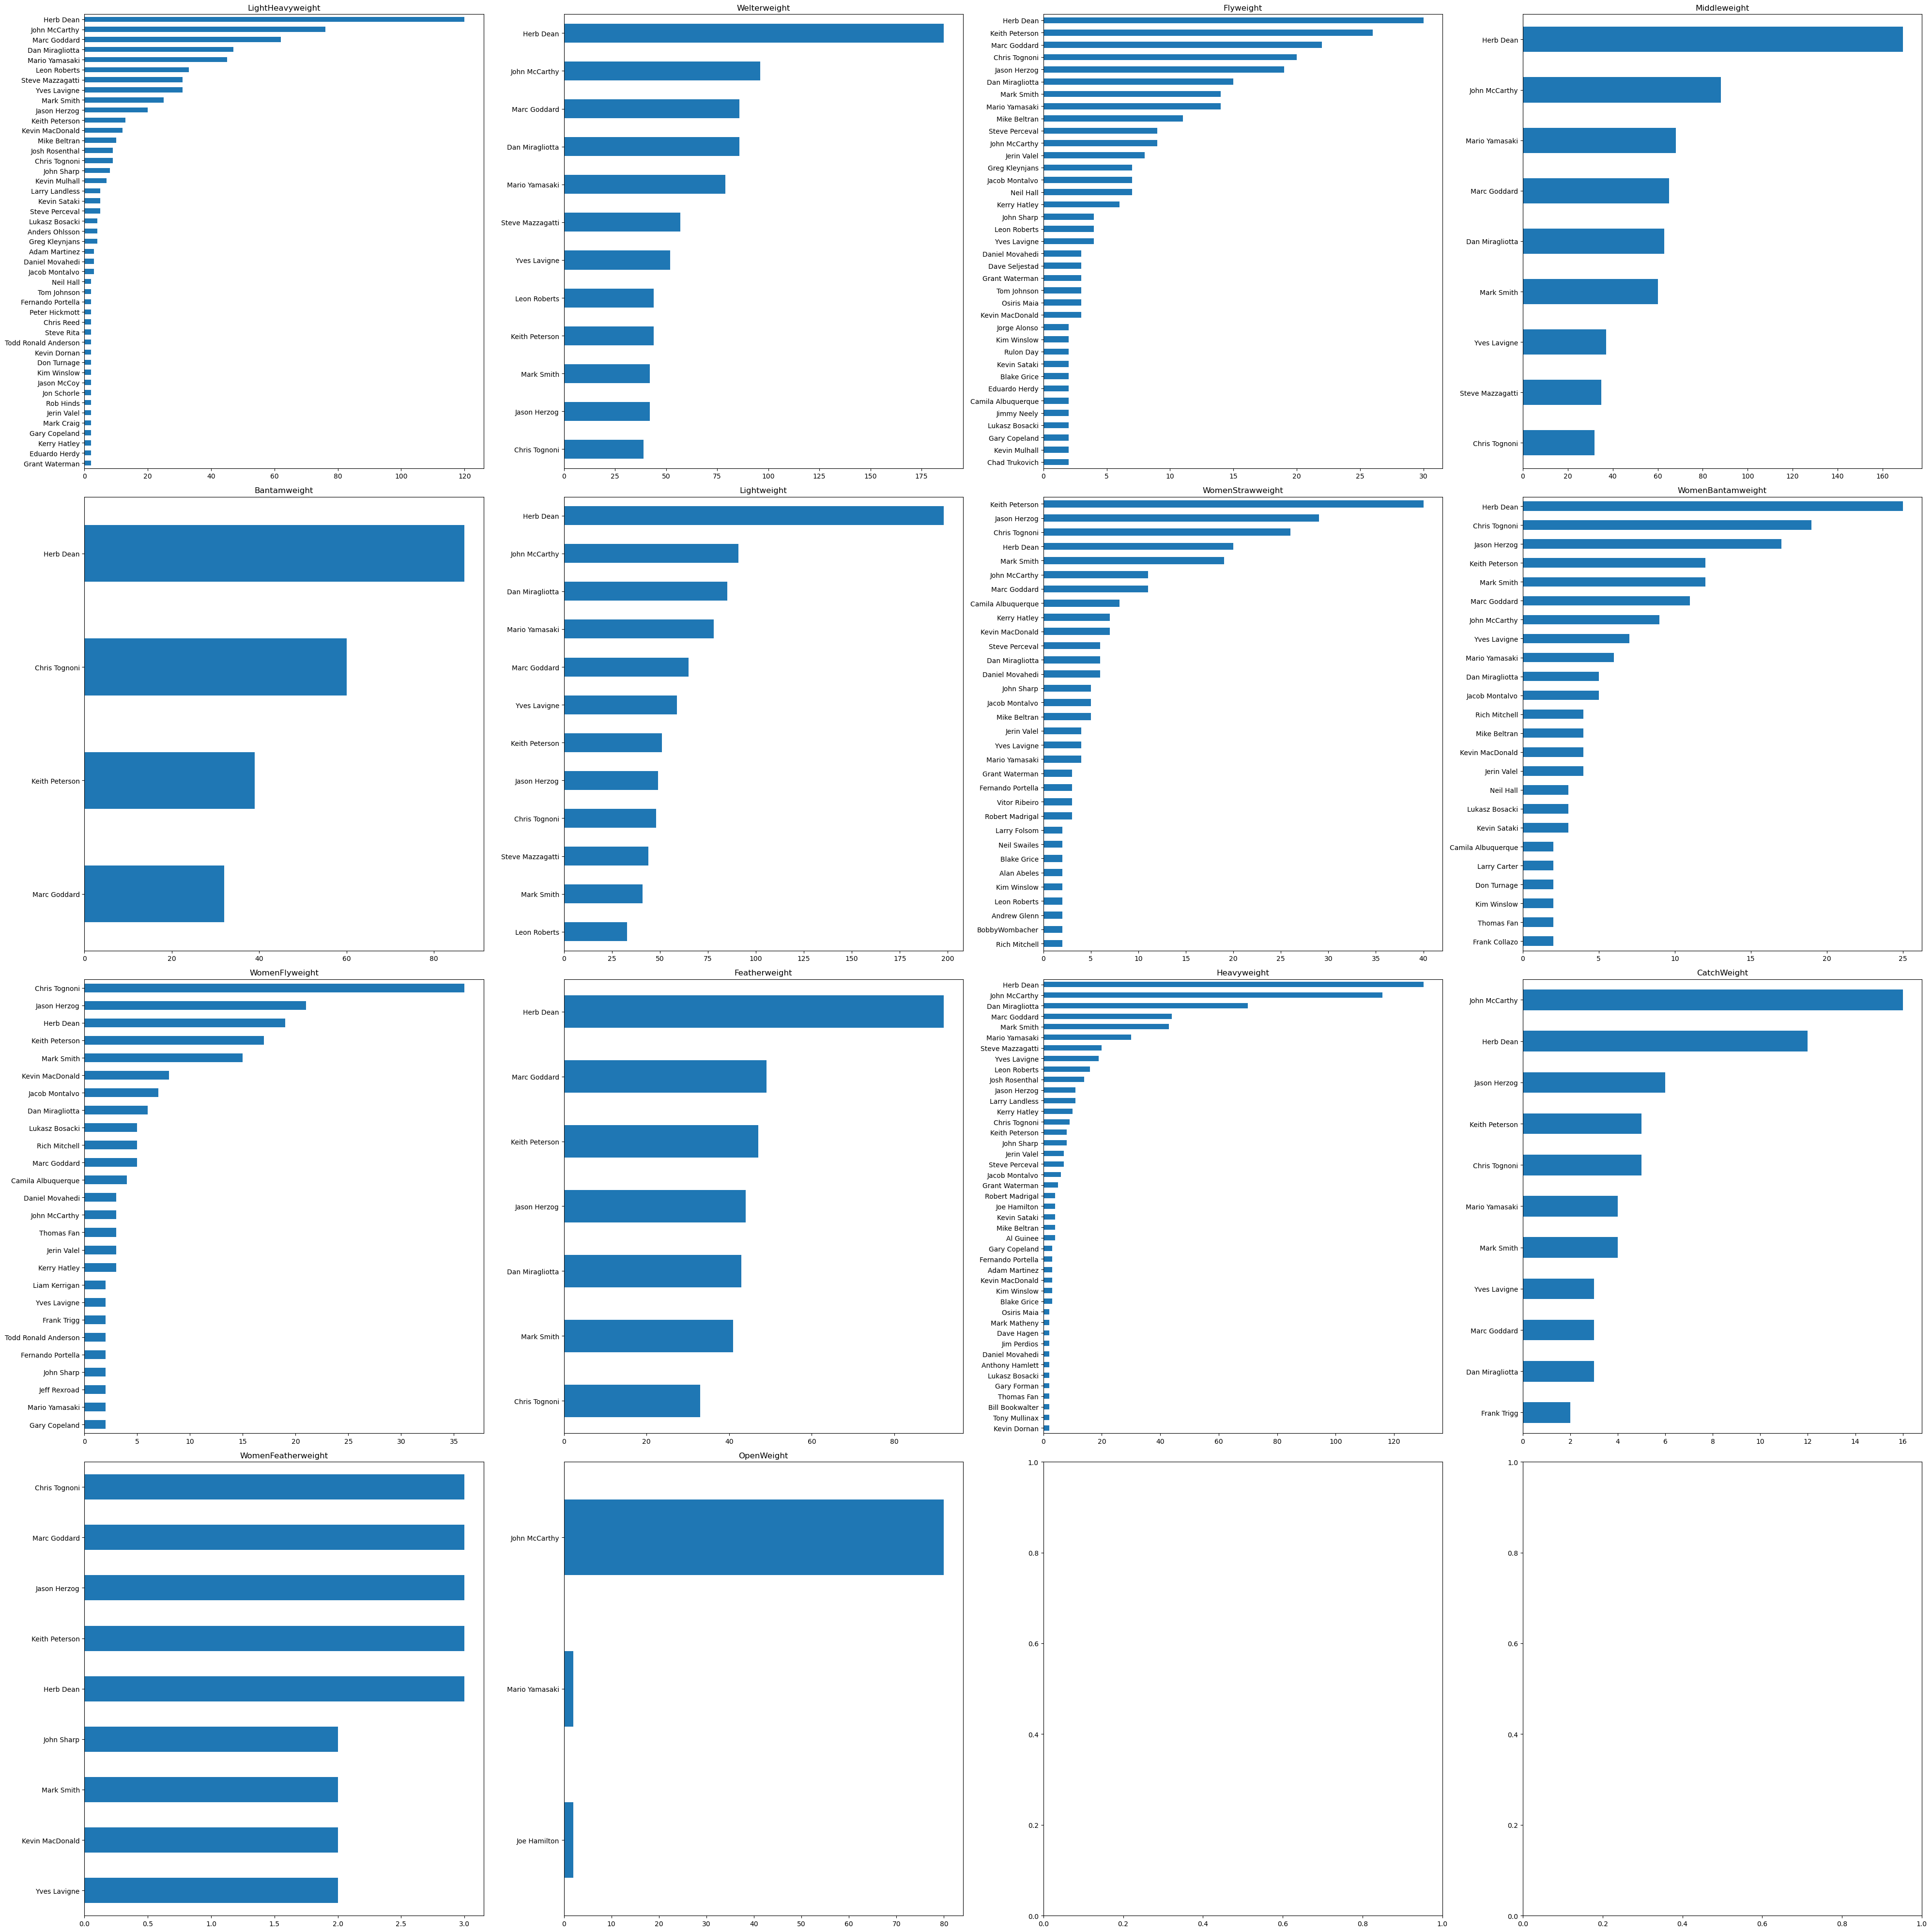

In [305]:
weight_classes = df['weight_class'].unique()

fig, axes = plt.subplots(4, 4, figsize=(40, 40))
axes = axes.flatten()

for ax, wc in zip(axes, weight_classes):
    ref_counts = df[df['weight_class'] == wc]['Referee'].value_counts()
    ref_counts = ref_counts[ref_counts > ref_counts.quantile(0.25)]
    if ref_counts.shape[0] > 50: 
        ref_counts = ref_counts[ref_counts > 30]

    ref_counts[::-1].plot(kind='barh', title=wc, ax=ax)

plt.tight_layout()

In [291]:
df['title_bout'].value_counts()

False    7007
True      417
Name: title_bout, dtype: int64

In [289]:
df.groupby('title_bout')['Referee'].agg(['value_counts'])

value_counts
title_bout Referee                        
False      Herb Dean                   980
           John McCarthy               516
           Dan Miragliotta             430
           Marc Goddard                417
           Mario Yamasaki              374
...                                    ...
True       John Sharp                    1
           Kevin Sataki                  1
           Osiris Maia                   1
           Philippe Chartier             1
           Robert Madrigal               1

[244 rows x 1 columns]

## Missing values analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(118), int64(16), object(9)
memory usage: 8.1+ MB


In [105]:
df.isna().sum().sum()

121106

In [104]:
df.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
       ... 
7419    103
7420    103
7421    104
7422    102
7423    106
Length: 7424, dtype: int64

## Pound for pound (P4P) ranking analysis
We can start by analysing the extremes of fighters, i.e., the pound for pound (p4p) best fighters and the "worst" fighters. This enables us to see which factors may contribute to the success of fighters. Conveniently, the UFC website has a p4p [ranking](https://www.ufc.com/rankings) that is actively maintained.

Current men's P4P ranking:
1. Islam Makhachev	
2. Jon Jones	
3. Alexander Volkanovski	
4. Leon Edwards	
5. Alex Pereira	
6. Charles Oliveira	
7. Sean Strickland
8. Sean O'Malley
9. Israel Adesanya	
10. Alexandre Pantoja	
11. Aljamain Sterling	
12. Tom Aspinall	
13. Max Holloway	
14. Kamaru Usman	
15. Jiří Procházka

We can first look at the win/loss/draws of each fighter to see how their fight history (in the UFC organisation) has been going on since joining. 

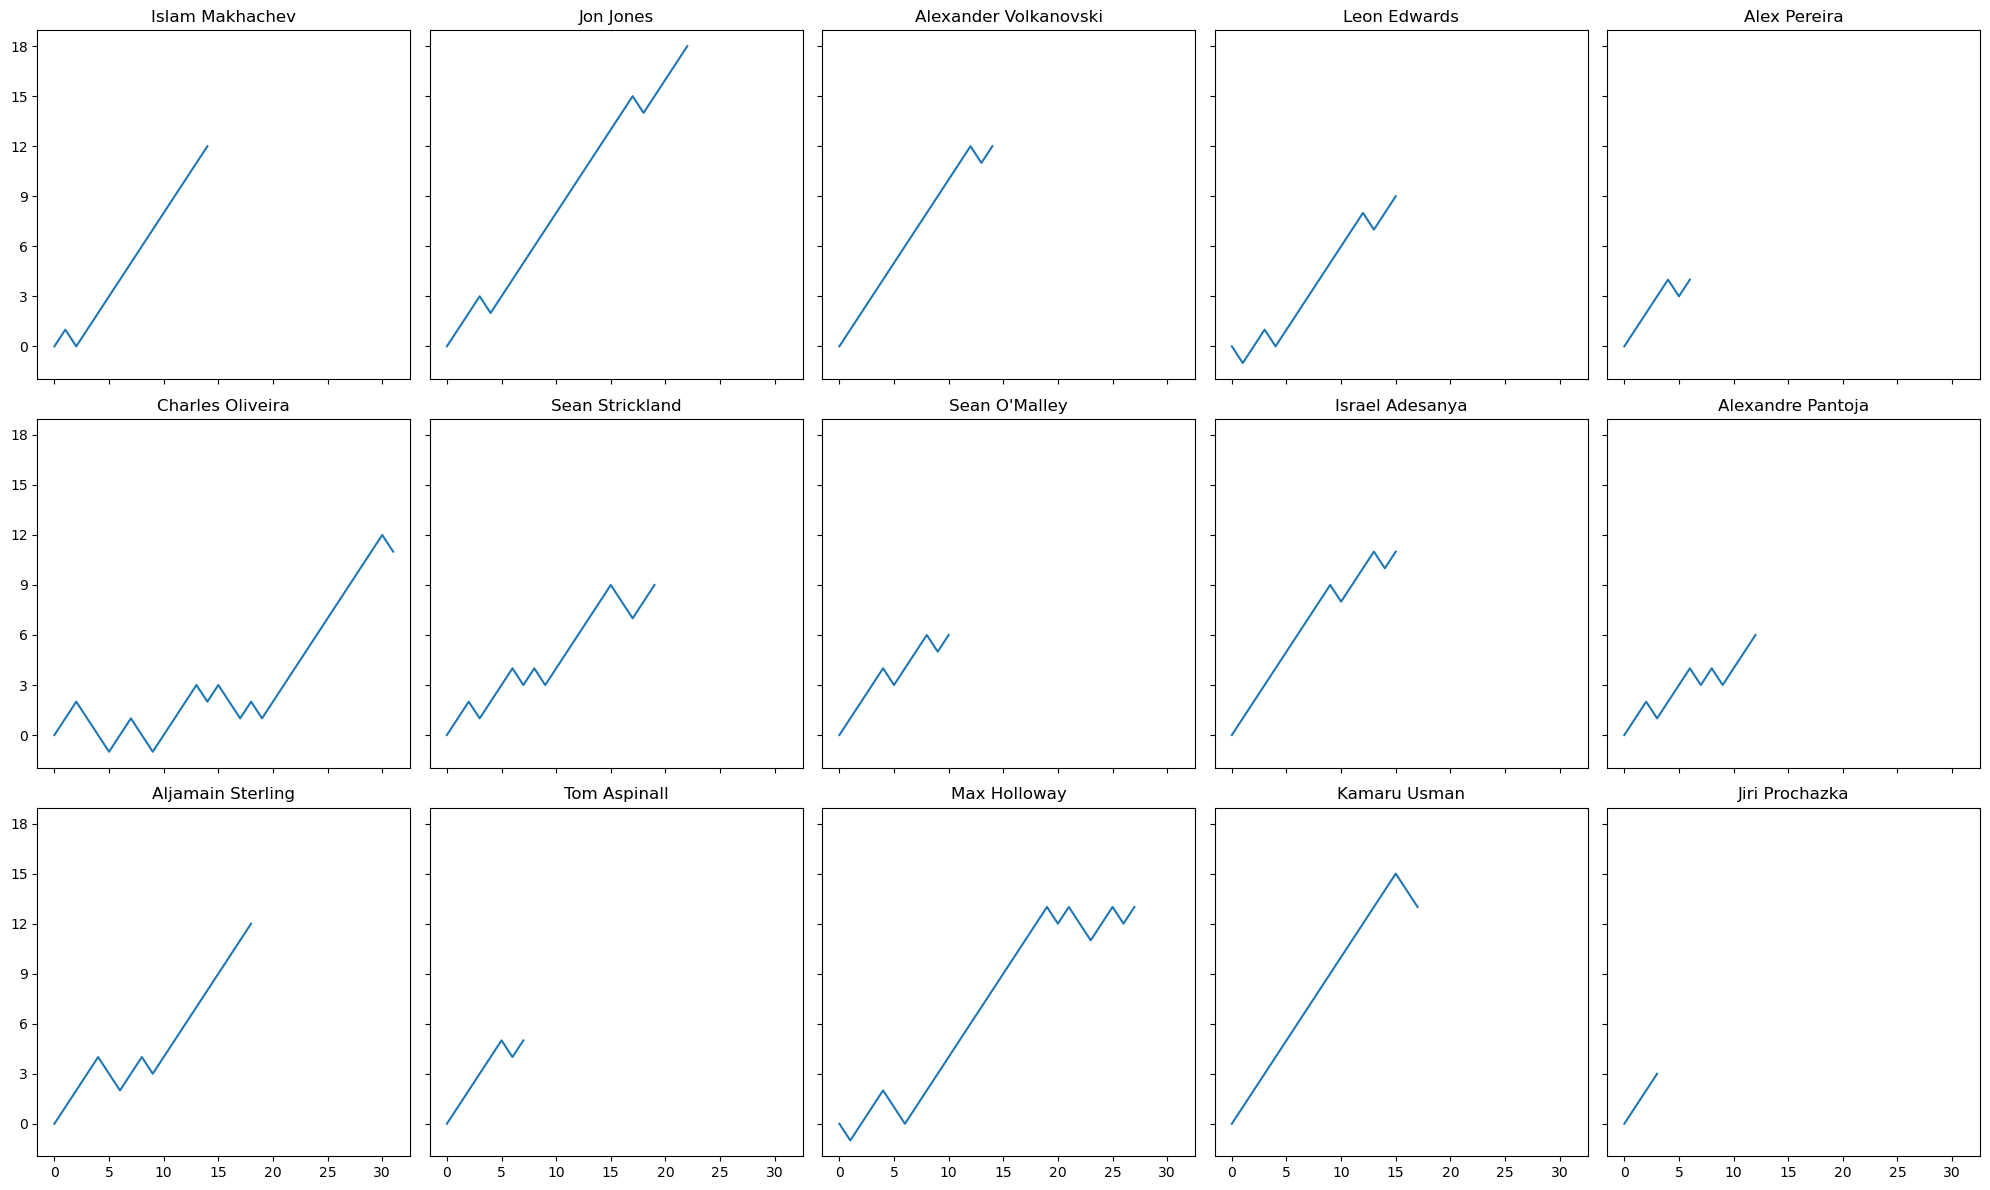

In [99]:
from matplotlib.ticker import MaxNLocator

p4p = np.array([
    "Islam Makhachev",
    "Jon Jones",
    "Alexander Volkanovski",
    "Leon Edwards",
    "Alex Pereira",
    "Charles Oliveira",
    "Sean Strickland",
    "Sean O'Malley",
    "Israel Adesanya",
    "Alexandre Pantoja",
    "Aljamain Sterling",
    "Tom Aspinall",
    "Max Holloway",
    "Kamaru Usman",
    "Jiri Prochazka",
])

fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

r_list = ["R_wins", "R_losses", "R_draw"]
b_list = ["B_wins", "B_losses", "B_draw"]

records = []

for i, fighter in enumerate(p4p):

    red_df = df[(df['R_fighter'] == fighter)]
    blue_df = df[(df['B_fighter'] == fighter)]

    red_record = red_df[["R_fighter", "B_fighter", "R_wins", "R_losses", "R_draw"]]
    red_record = red_record.rename(columns=lambda x: x[2:] if x in r_list else x)
    blue_record = blue_df[["R_fighter", "B_fighter", "B_wins", "B_losses", "B_draw"]]
    blue_record = blue_record.rename(columns=lambda x: x[2:] if x in b_list else x)
    total_record = pd.concat([red_record, blue_record]).sort_index()[::-1]

    diff = (total_record['wins'] - total_record['losses']).to_numpy()
    draw_diff = np.diff(total_record['draw'], 1, axis=0)
    draw_diff_indices = np.where(draw_diff != 0)[0]
    diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
    sns.lineplot(x=list(range(diff.shape[0])), y=diff, ax=axes[i])
    axes[i].set_title(fighter)
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

    records.append([fighter, *total_record.iloc[-1:, 2:].to_numpy().ravel()])

plt.tight_layout()


The above plot shows the wins minus the losses at each time step (new fight) in the fighter's career. Looking at the above plots, it is clear that some fighters are exceptional from the beginning, only losing a few times in their career, e.g., Jon Jones and Islam Makhachev, whereas some fighters thrived later in their career, e.g., Charles Oliveira. In the case of the latter, the bumpy spikes indicate wins and losses early on, and a steep climb later on. 

It is noteworthy to mention that the last fights are not incorporated in this visualisation. Furthermore, the "No Contest" (NC) ruling is also regarded as a loss, as can be see in the plot of Jon Jones whose record is 27-1-0 (1 NC). 

<AxesSubplot: title={'center': 'P4P win/loss counts'}, ylabel='fighter'>

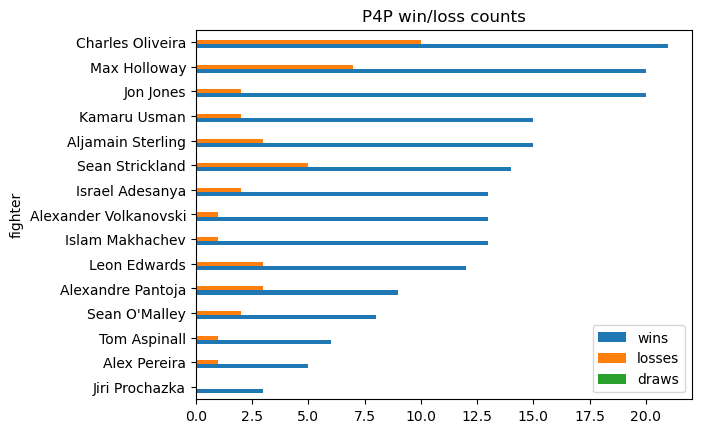

In [97]:
p4p_records = pd.DataFrame(records, columns=['fighter', 'wins', 'losses', 'draws']).sort_values('wins')

p4p_records.plot(x='fighter', kind='barh', title="P4P win/loss counts")

In [53]:
df[df['R_fighter'].str.contains('Prochazka') | df['B_fighter'].str.contains('Prochazka')]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
41,Jiri Prochazka,Alex Pereira,Marc Goddard,2023-11-11,"New York City, New York, USA",Blue,True,LightHeavyweight,0.09375,0.25,0.670312,0.544063,0.125,0.232813,0.5,1.0,0.0,0.0,95.53125,63.90625,91.5,49.875,128.0,93.25,116.03125,69.65625,0.125,0.125,4.96875,1.75,46.125,22.5625,66.28125,32.0,24.0,20.8125,14.6875,8.75,25.40625,20.53125,10.53125,9.125,87.125,56.875,81.40625,42.6875,7.6875,6.375,4.0625,2.15625,0.71875,0.65625,6.03125,5.03125,9.59375,289.5625,803.1875,16,2,4,0,4,5,1,0,0.0,1.0,1.0,3.0,0.0,0.0,Orthodox,193.04,200.66,205.0,0.500000,0.00000,0.542500,0.595000,0.250000,0.395000,0.500000,0.750000,2.000000,1.000000,154.750000,87.500000,130.500000,81.500000,175.000000,106.250000,158.250000,107.500000,0.250000,0.250000,9.000000,2.750000,141.500000,75.500000,111.750000,66.250000,12.000000,10.750000,15.000000,12.000000,1.250000,1.250000,3.750000,3.250000,119.750000,63.750000,91.000000,47.000000,6.000000,4.250000,3.750000,3.250000,29.000000,19.500000,35.750000,31.250000,158.750000,305.000000,965.500000,9,1,3,0,3,3,0,0,0.0,0.0,0.0,2.0,1.0,0.0,Orthodox,190.50,203.20,205.0,36.0,31.0
790,Glover Teixeira,Jiri Prochazka,Marc Goddard,2022-06-11,"Kallang, Singapore",Blue,True,LightHeavyweight,1.00000,0.00,0.505000,0.510000,0.500,0.500000,0.0,0.5,0.0,0.0,104.50000,55.00000,100.0,52.000,105.0,55.50,104.50000,56.00000,0.500,0.500,1.00000,0.50,93.000,45.0000,78.50000,3

In [48]:
df.filter(like="Ji", axis=2)

ValueError: No axis named 2 for object type DataFrame

In [ ]:
r_list = ["R_wins", "R_losses", "R_draw"]
b_list = ["B_wins", "B_losses", "B_draw"]
for fighter in df[['R_fighter', 'B_fighter']].unstack().unique()[:100]:

    red_df = df[(df['R_fighter'] == fighter)]
    blue_df = df[(df['B_fighter'] == fighter)]

    red_record = red_df[["R_fighter", "B_fighter", "R_wins", "R_losses", "R_draw"]]
    red_record = red_record.rename(columns=lambda x: x[2:] if x in r_list else x)
    blue_record = blue_df[["R_fighter", "B_fighter", "B_wins", "B_losses", "B_draw"]]
    blue_record = blue_record.rename(columns=lambda x: x[2:] if x in b_list else x)
    total_record = pd.concat([red_record, blue_record]).sort_index()[::-1]

    diff = (total_record['wins'] - total_record['losses']).to_numpy()
    draw_diff = np.diff(total_record['draw'], 1, axis=0)
    draw_diff_indices = np.where(draw_diff != 0)[0]
    diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
    sns.lineplot(x=list(range(diff.shape[0])), y=diff, label=fighter)
plt.legend()

In [130]:
diff = (total_jones_record['wins'] - total_jones_record['losses']).to_numpy()
draw_diff = np.diff(total_jones_record['draw'], 1, axis=0)
# draw_diff = np.zeros((diff.shape[0]-1))
# draw_diff[5] = 1
# draw_diff[10] = 2
draw_diff_indices = np.where(draw_diff != 0)[0]
diff = np.insert(diff, draw_diff_indices, diff[draw_diff_indices])
# diff

array([ 0,  1,  2,  3,  2,  3,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12,
       13, 14, 15, 14, 15, 16, 17, 18], dtype=int64)

<AxesSubplot: ylabel='diff'>

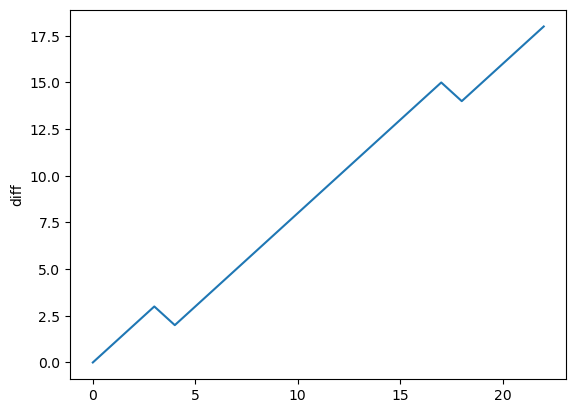

In [84]:
sns.lineplot(total_jones_record, x=range(total_jones_record.shape[0]), y='diff')

In [ ]:
sns.lineplot()

In [16]:
df.head(1).filter(regex='^R_.*').columns

Index(['R_fighter', 'R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_pct',
       'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_opp_TD_pct',
       'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV', 'R_avg_opp_REV',
       'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att',
       'R_avg_opp_SIG_STR_landed', 'R_avg_TOTAL_STR_att',
       'R_avg_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_avg_TD_att', 'R_avg_TD_landed',
       'R_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_HEAD_att',
       'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed',
       'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_opp_BODY_att',
       'R_avg_opp_BODY_landed', 'R_avg_LEG_att', 'R_avg_LEG_landed',
       'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed', 'R_avg_DISTANCE_att',
       'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att',
       'R_avg_opp_DISTANCE_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed',
       'R_avg_opp_CLINCH_att',

In [39]:
# df[]
df.isnull() == True

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
7420,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True
7421,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,False
7422,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,True


[0,
 0,
 33,
 0,
 0,
 2,
 0,
 0,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 1627,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 55,
 10,
 882,
 8,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 809,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 39,
 22,
 418,
 20,
 172,
 81]